# Name: Nandish Bakulkumar Bhatt 
# Student ID: 200441204 

#### Acknowledgment: I would like to express my gratitude to Dr. Abdul Bais and Dr. Muhammad Hamza Asad for their continuous guidance and encouragement during this course. Without their support, this work would not been possible. The notes prepared by them is really comprehensive and has a deep learning.


## Importing Libraries

In [418]:
#Firstly importing all specific libraries needed in our program

import numpy as np #for array operations
import scipy as sp  
import pandas as pd  #for data processing and extracting data from file

# scikit-learn functions
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree

# Plotting and Visulization
from IPython.display import display
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt #for plotting the functions
import seaborn as sns #for making statistical graphics

#This library provides classes and functions for the estimation of many different statistical modelsStatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Reading/Extracting the Data from dataset

In [419]:
#Loading the data from csv file

#Storing the data into dataframe
df=pd.read_csv("D:/MENG/Sem3/ENEL 865-ML/Assignment/Programming Assignment/PA4/dataset-11424.csv")

#Prinitng the dataset
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [420]:
#Printing the first 10 rows of dataset
print("The first 10 rows of the dataset is as follows:\n")
df.head(10)

The first 10 rows of the dataset is as follows:



,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [421]:
#Number of observations and Number of features

print("Thus,Total Number of observations and Number of features are respectively:")
df.shape


Thus,Total Number of observations and Number of features are respectively:


(400, 11)

In [422]:
#Now,checking that data has null value or not.
#First, checking that is there any missing values present in each column or not.
#If there is atleast one missing value in particular column, then it will give "True" otherwise if it doesn't then "False"

df.isna().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [423]:
#If any data has null value, then adding all these null data and looking upon the total number of missing data. 
 
print("Sum of Null Values in respective dataframes:")
df.isna().sum()

Sum of Null Values in respective dataframes:


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [424]:
#Now, know about the data type of each column.
print("Data Type of each column")
df.info()

Data Type of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [425]:
#Now, it is observed from the dataset and the data type of each column, that- 

In [426]:
#Urban and US are categrical variables(object data type), so we need to convert it into numerical variables.

#It has been also observed from the dataset that, Sales price is in numerical data, so we need to convert labels into integers.

#ShelveLoc variable is also of object data type, so converting it into categorical variable. 

In [427]:
# Urban and US are categrical variables(object data type), so we need to convert it into numerical variables.
#Yes=1 and No=0 using the Mapping Function

df.Urban = df.Urban.map({'Yes':1, 'No':0})
df.US = df.US.map({'Yes':1, 'No':0})

# Shelve Loc Variable is of object data type so converting it into numerical data such that,
# Bad:0 | Good:1 | Medium:2
#Using the following to encode the object as an enumerated type or categorical variable.

df.ShelveLoc=pd.factorize(df.ShelveLoc)[0]

#The Sales price is in different numerical ranges,so based on that is classified on range.

df.Sales = df.Sales.map(lambda x:1 if x>8 else 0) #lambda is a function, so it assigns 1 if its value is greater than 8,
#otherwise assigns 0 for any value of x.

#printing the dataframe of final step
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [428]:
#Now, checking the information of data types of the dataframe. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban        400 non-null    int64
 10  US           400 non-null    int64
dtypes: int64(11)
memory usage: 34.5 KB


In [429]:
#It looks like all data is good now.

## Q-1(A) Train-Test Split

In [430]:
#Importing only Train-Test-Split function from Scikit module.
#Thus, we will obtain training values of x,y and Test Values of x,y.
#I have divided the data randomly into 80% training and rest 20% in testing.


x = df.iloc[:,1:11] #all features except 'Sales' are assigned to x
y = df['Sales'] #only 'Sale' feature will come
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0) #random state indicates shuffling of data before splitting

## Q-1(B) Fitting Regression Tree to the Training Set

In [431]:
# Pre-defined function 'DecisionTreeRegression' is used to fit regression tree.
#'DecisionTreeRegression' is actually 1D Regression with decision tree 

reg_tree= DecisionTreeRegressor(max_depth=3) #assumed max_depth=3 as if it is too high then decision tree learns..
# good details of training data and learn from noise, i.e; they overfit.So, depths should not be that much high

#fitting this on training dataset
reg_tree.fit(x_train, y_train)

#calculating the training score of how the model fits on training data
reg_tree.score(x_train,y_train)


0.37941663218379185

### Plotting the tree and interpreting result

Text(0.5, 1.0, 'Decision Regression Tree For Maximum Depth=3')

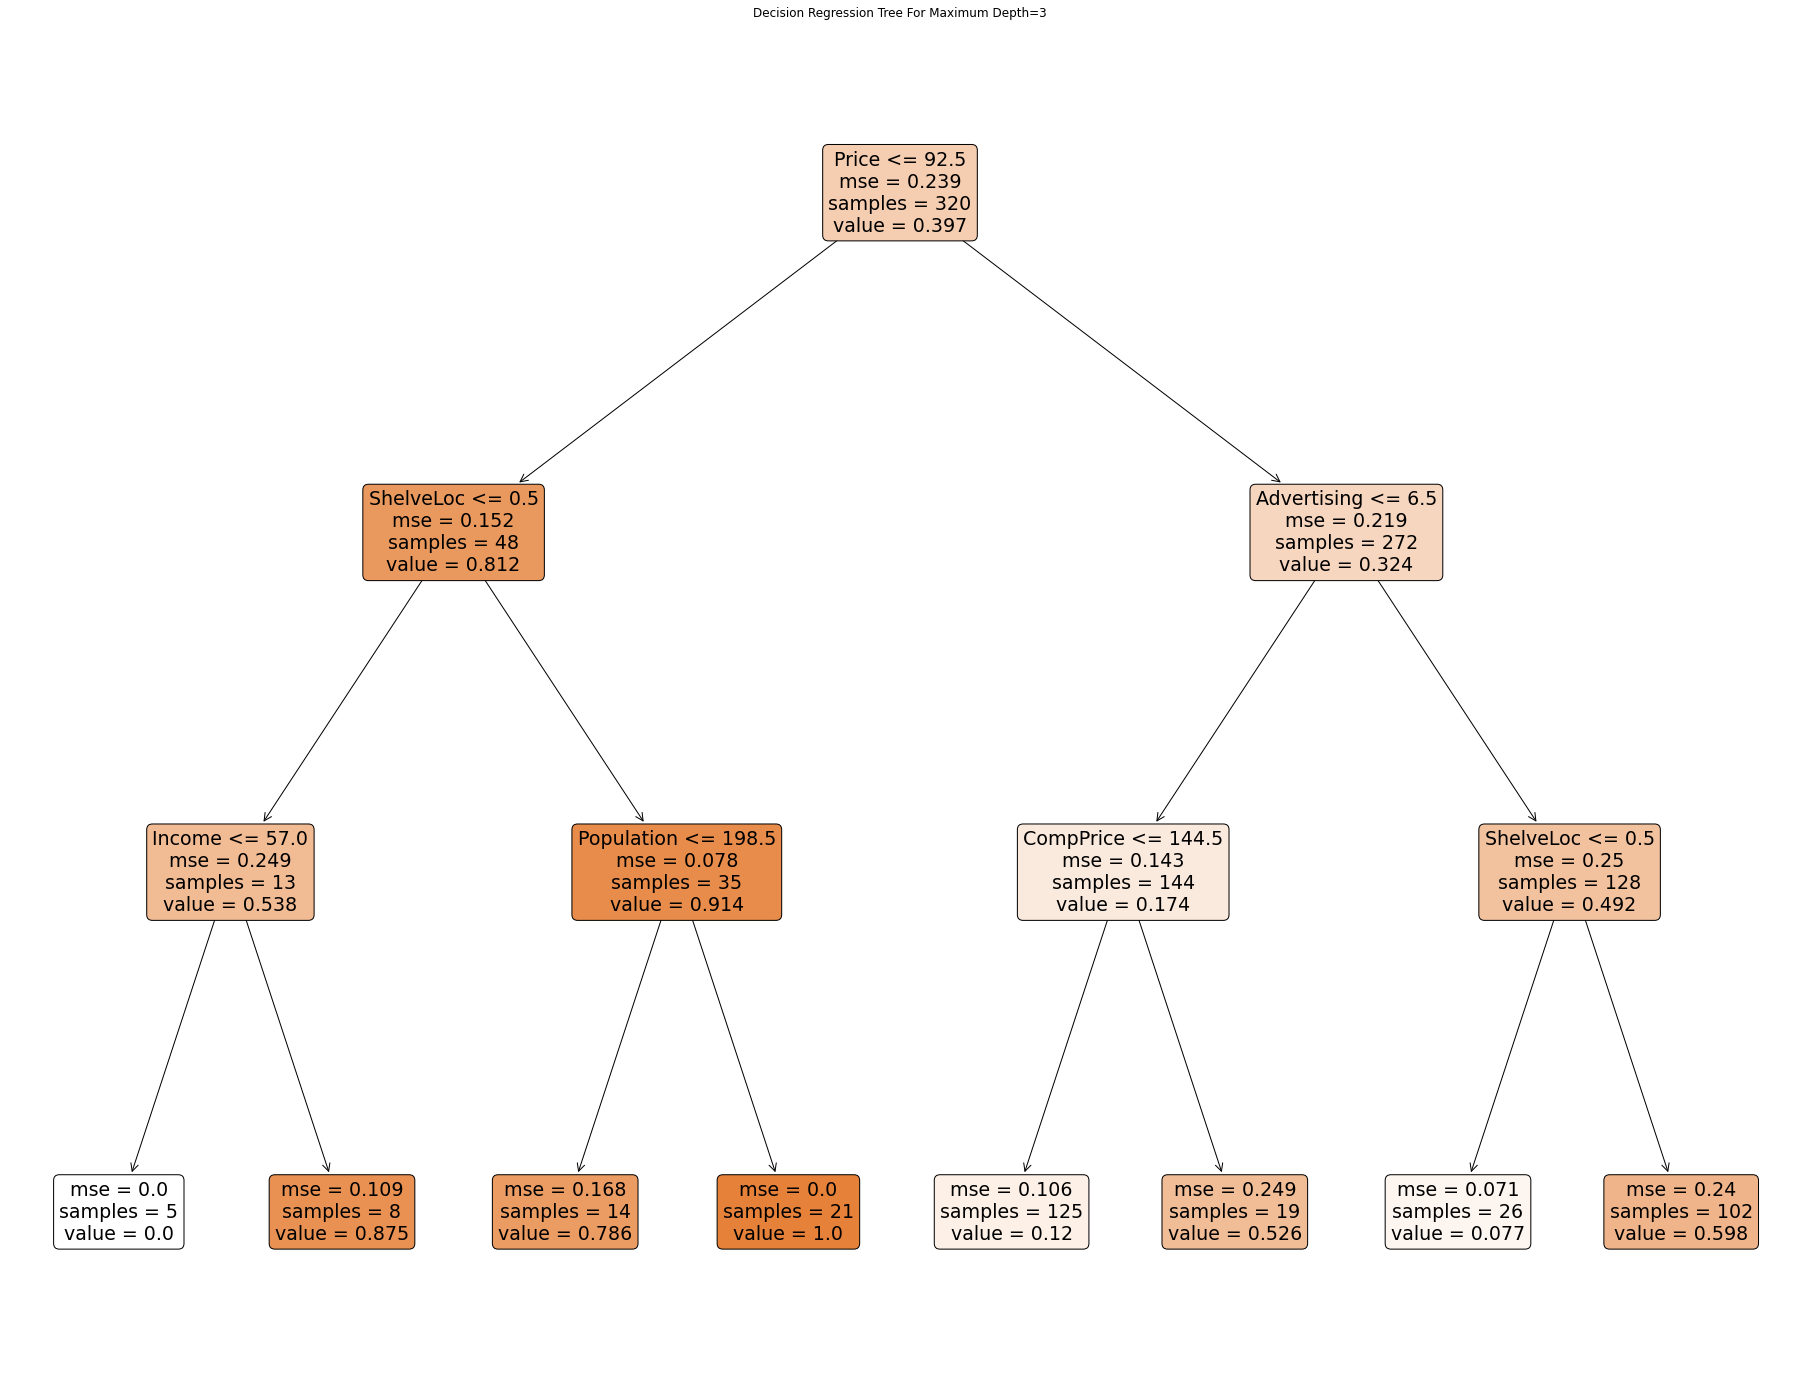

In [432]:
#creating plot of figure of decision tree
figtree=plt.figure(figsize=(32,25))

#sci-kit function to plot a decision tree
tree.plot_tree(reg_tree.fit(x_train,y_train),feature_names=x.columns,filled=True,rounded=True,impurity=True,fontsize=19)
plt.title('Decision Regression Tree For Maximum Depth=3')

#### Prediction on Test Data

The Mean Squared Error(MSE) Value is :  0.2044845665939871


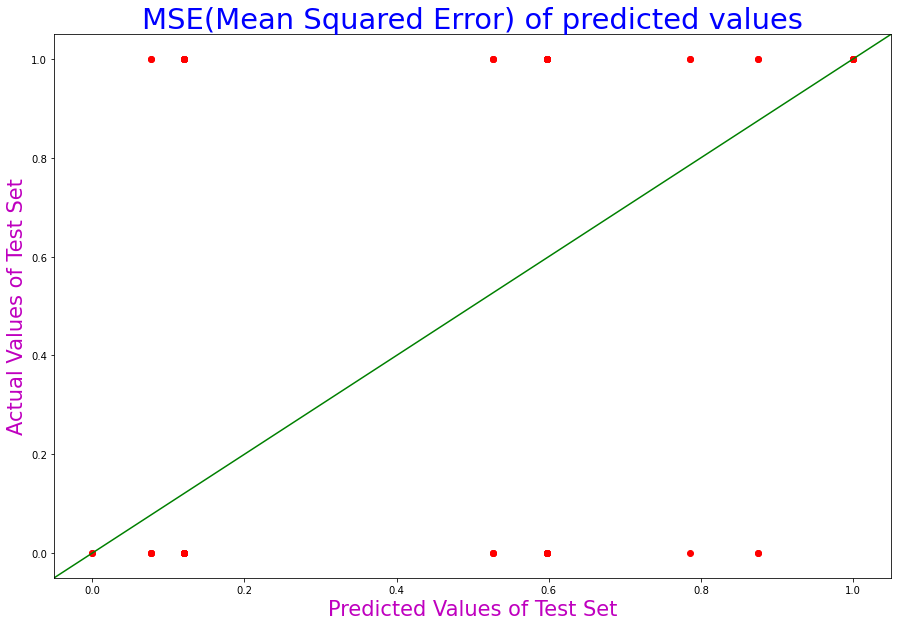

In [433]:
# Evaluating the tree's performance on test data
# predefined function named, "predict()" used for this 

pred_test = reg_tree.predict(x_test)

#Test Mean Square Estimation
#plotting on graph
plt.figure(figsize=(15,10))
plt.scatter(pred_test, y_test , label = 'MSE', color='r')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)

plt.xlabel('Predicted Values of Test Set', color='m', fontsize=21)
plt.ylabel('Actual Values of Test Set', color='m', fontsize=21)
plt.title('MSE(Mean Squared Error) of predicted values', fontsize=29, color='b')


print("The Mean Squared Error(MSE) Value is : ", mean_squared_error(y_test, pred_test))

## Q-1(C) Determining the optimal level of tree complexity using Cross-Validation

The best tree has 15 leafs.


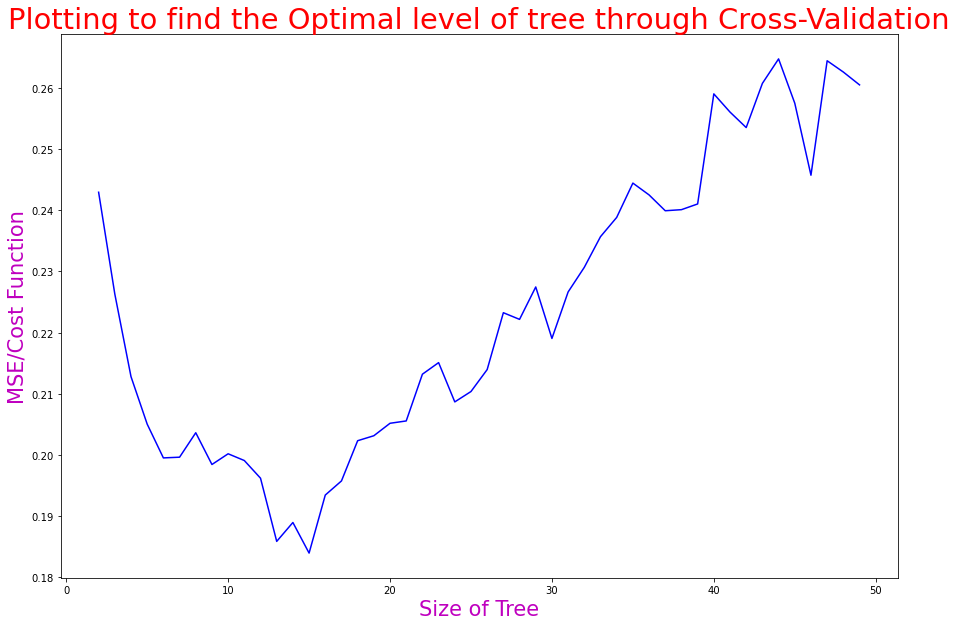

In [434]:

scores=[] #defining empty list
leafs_range = range(2, 50) #range of leaf 

#for loop is used to check the score values corresponding to different leaafs and finding best tree with lowest MSE.
for max_leafs in leafs_range: 
    reg_tree = DecisionTreeRegressor(max_leaf_nodes=max_leafs)
    cross_valid_score = cross_val_score(reg_tree, x, y, cv=10, scoring="neg_mean_squared_error")
    scores.append((-cross_valid_score.mean(), cross_valid_score.std()))

scores = np.array(scores) #coverting into numpy array

#plotting
plt.figure(figsize=(15, 10))
plt.plot(leafs_range, scores[:,0], 'b')
plt.xlabel('Size of Tree', fontsize=21, color='m')
plt.ylabel('MSE/Cost Function', fontsize=21, color='m')
plt.title('Plotting to find the Optimal level of tree through Cross-Validation', fontsize=29, color='r')

best_lf = leafs_range[np.argmin(scores[:,0])]
print(f"The best tree has {best_lf} leafs.")

Text(0.5, 1.0, 'Decision Regression Tree')

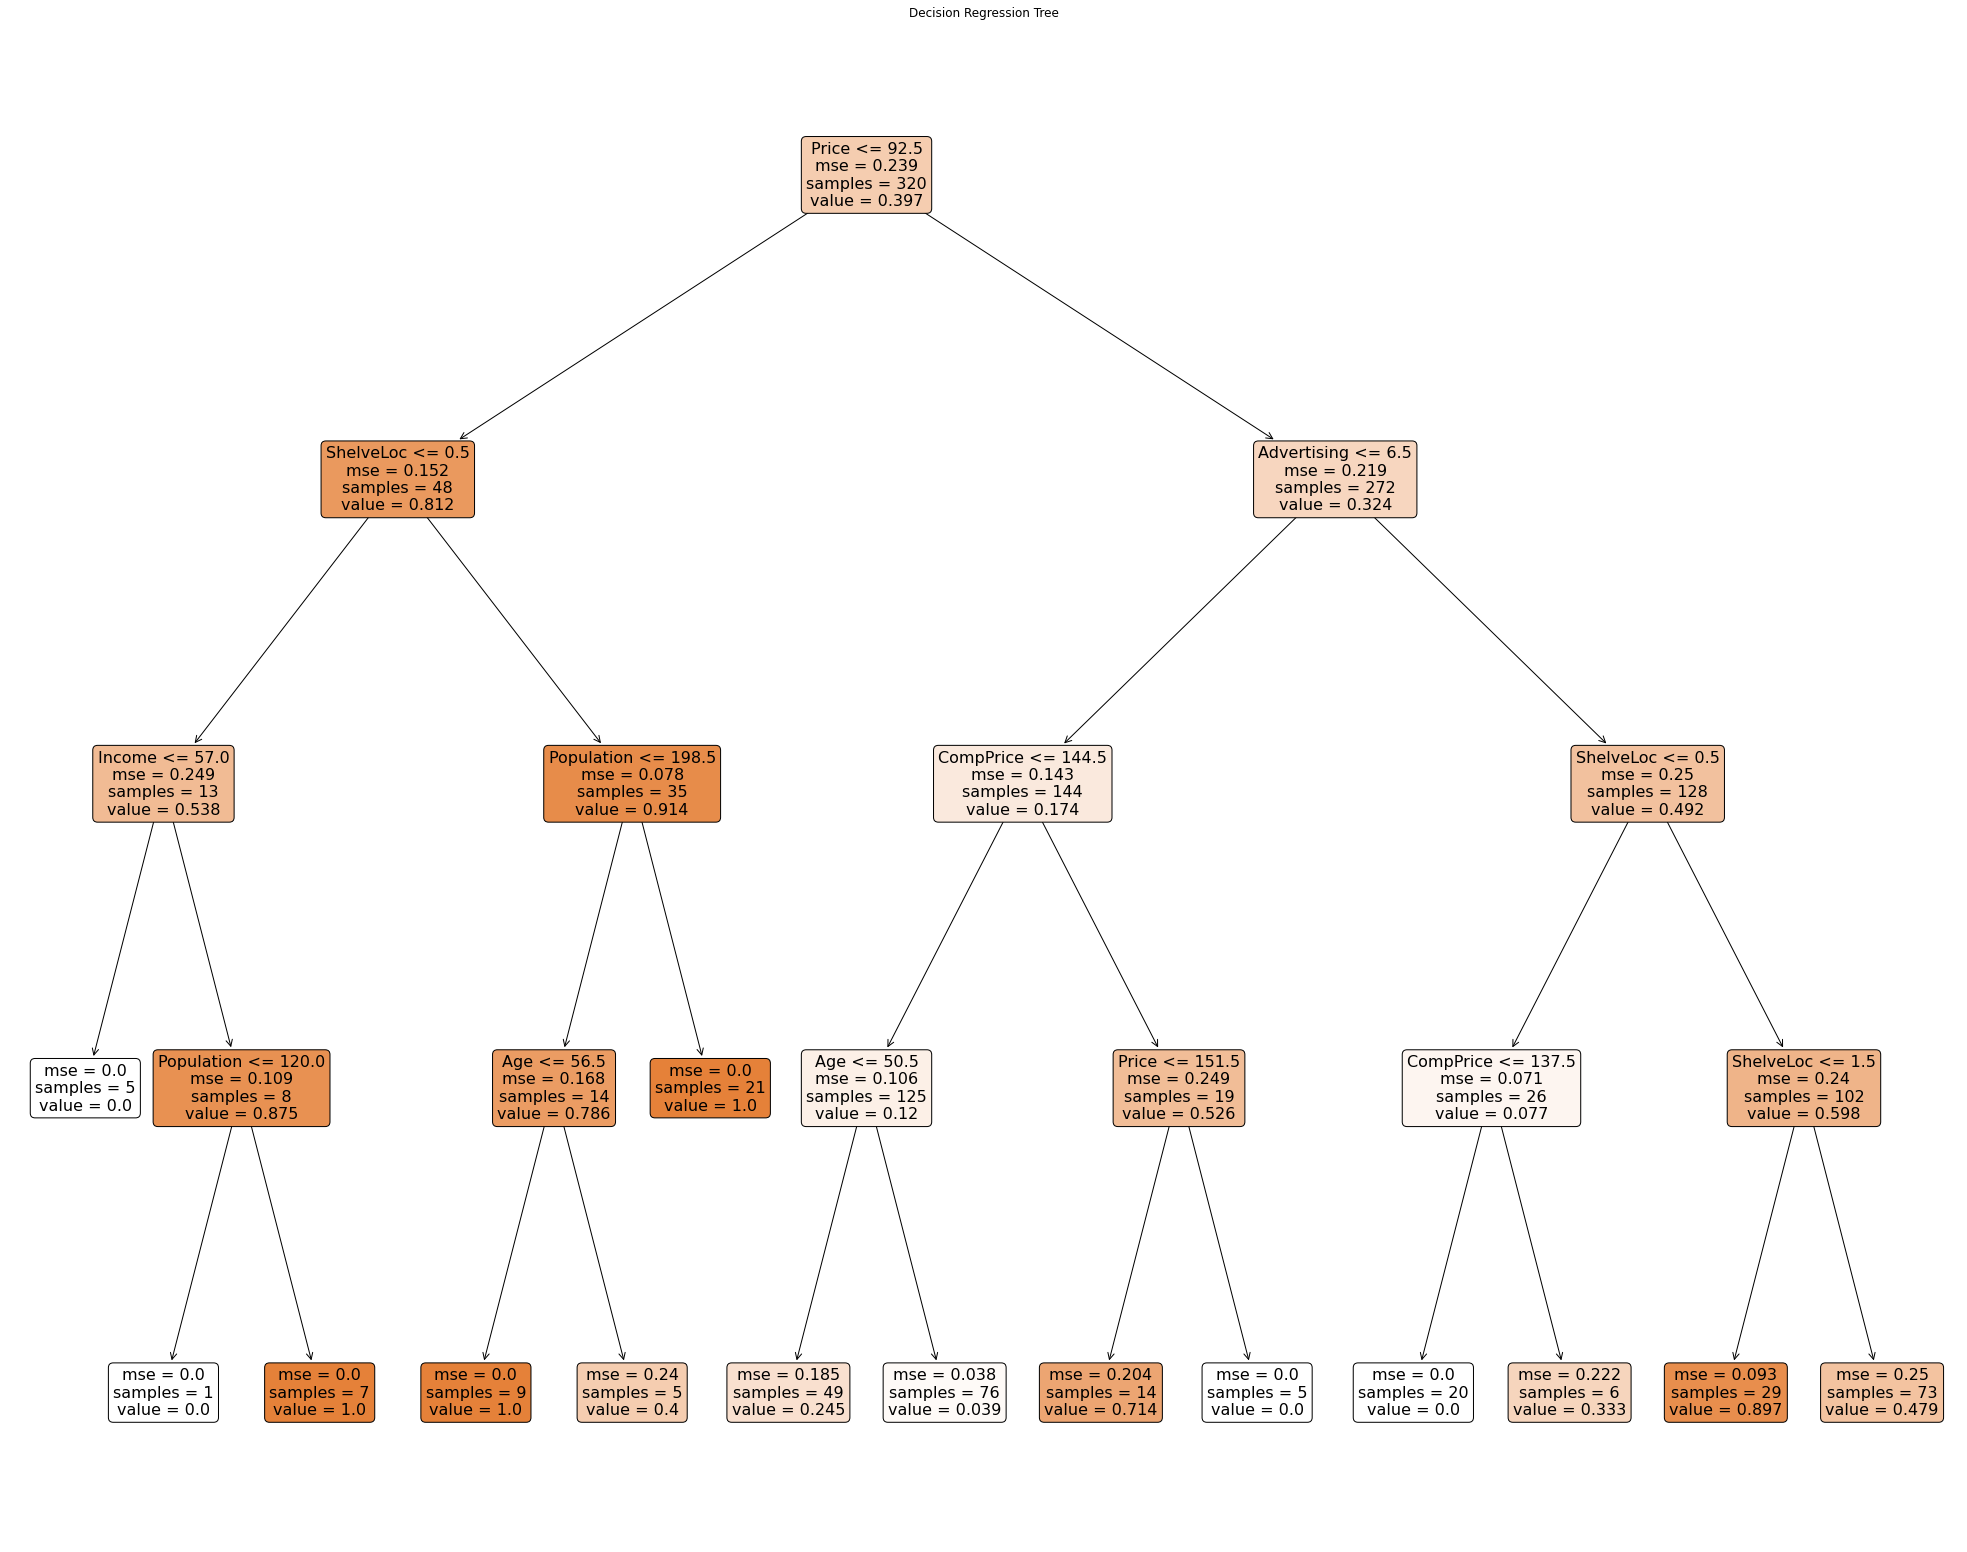

In [435]:
#Since, we get best tree has 15 leafs, so increasing the depths of tree , but not increasing that much
#which leads to overfitting. So again fitting all data according to max_depths=4. 

reg_tree = DecisionTreeRegressor(max_depth = 4).fit(x_train, y_train)

figtree=plt.figure(figsize=(35,28))
tree.plot_tree(reg_tree.fit(x_train,y_train),feature_names=x.columns,filled=True,rounded=True,fontsize=16);
plt.title('Decision Regression Tree')

The Mean Squared Error(MSE) Value is :  0.20643426772212664


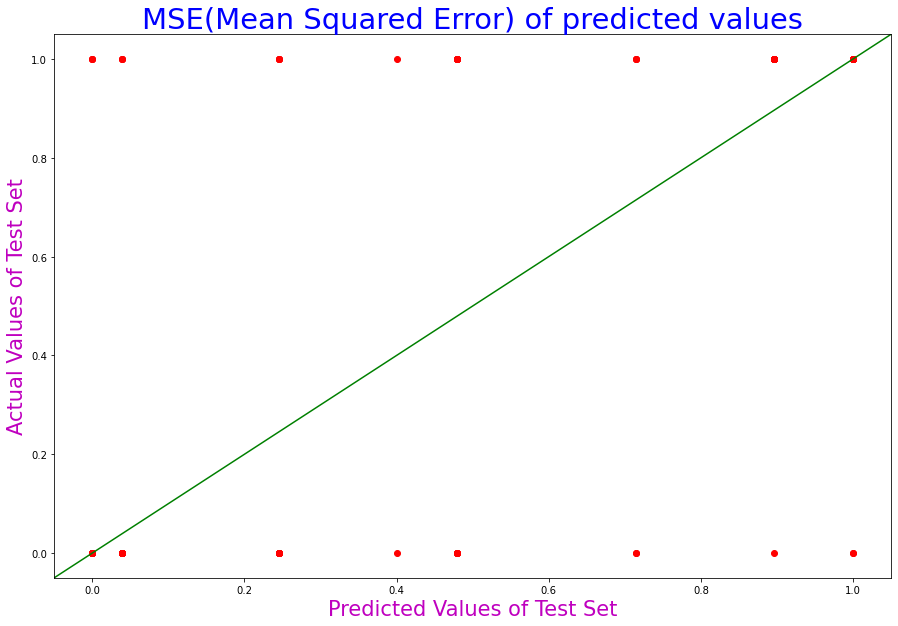

In [436]:
# Again, Evaluating the tree's performance on test data
# predefined function named, "predict()" used for this 

pred_test = reg_tree.predict(x_test)

#Test Mean Square Estimation
#plotting on graph
plt.figure(figsize=(15,10))
plt.scatter(pred_test, y_test , label = 'MSE', color='r')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)

plt.xlabel('Predicted Values of Test Set', color='m', fontsize=21)
plt.ylabel('Actual Values of Test Set', color='m', fontsize=21)
plt.title('MSE(Mean Squared Error) of predicted values', fontsize=29, color='b')


print("The Mean Squared Error(MSE) Value is : ", mean_squared_error(y_test, pred_test))

## Q- 1(D) Bagging Approach to Analyse the data

Mean Squared Error in case of bagging is :  0.16932875


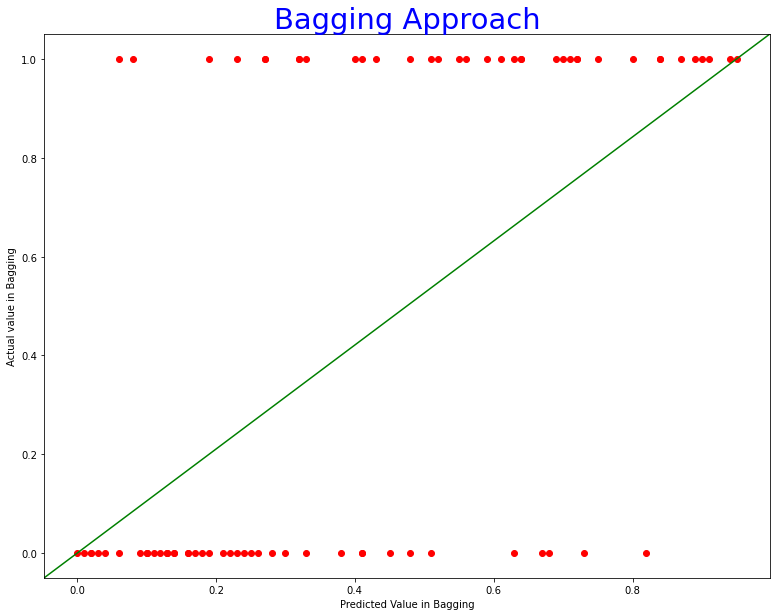

In [437]:
#Using the pre dedfined function of Random Forest Regressor
bagging=RandomForestRegressor(max_features=10)

#fitting the model on given training dataset and based on the model formed, the predicted value is computed.
bag_fit= bagging.fit(x_train, y_train)
bag_pred = bag_fit.predict(x_test)

#plotting
plt.figure(figsize=(13, 10))
plt.scatter(bag_pred, y_test, label = 'medv', color='r')
plt.plot([0, 1], [0, 1], 'g', transform = plt.gca().transAxes)
plt.xlabel('Predicted Value in Bagging')
plt.ylabel('Actual value in Bagging')
plt.title('Bagging Approach', fontsize=29, color='b')

print("Mean Squared Error in case of bagging is : ", mean_squared_error(y_test, bag_pred))

## Q-1 (E)  Using Random Forest to Analyse the data

Mean Squared Error in case of Random Forest is :  0.15737


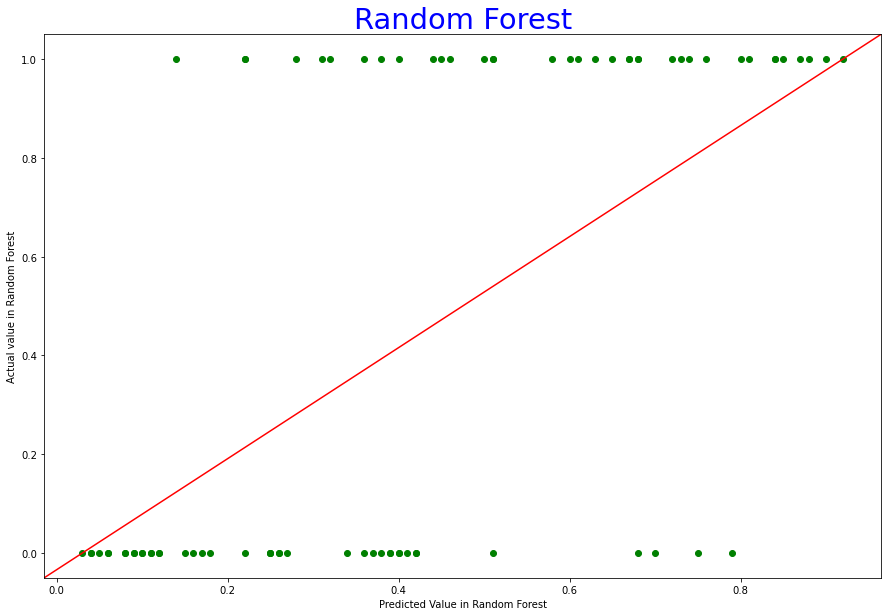

In [438]:
#Using the pre dedfined function of Random Forest Regressor to find random forest 
randomforest=RandomForestRegressor(max_features=4)

#fitting data on training set
randforest_fit = randomforest.fit(x_train, y_train)
randforest_pred = randforest_fit.predict(x_test)

#plotting
plt.figure(figsize=(15, 10))
plt.scatter(randforest_pred, y_test, label = 'medv', color='g')
plt.plot([0, 1], [0, 1], 'r', transform = plt.gca().transAxes)
plt.xlabel('Predicted Value in Random Forest')
plt.ylabel('Actual value in Random Forest')
plt.title('Random Forest', fontsize=29, color='b')

print("Mean Squared Error in case of Random Forest is : ", mean_squared_error(y_test, randforest_pred))

# Q-2 K-Means Clustering 

### Reading/Extracting the data from dataset of Fish

In [439]:
#Loading the data from csv file

#Storing the data into dataframe
df1=pd.read_csv("D:/MENG/Sem3/ENEL 865-ML/Assignment/Programming Assignment/PA3/archive/Fish.csv")

df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [440]:
#Now, know about the data type of each column.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [441]:
#Now,checking that data has null value or not.
#First, checking that is there any missing values present in each column or not.
#If there is atleast one missing value in particular column, then it will give "True" otherwise if it doesn't then "False"

df1.isna().any()

Species    False
Weight     False
Length1    False
Length2    False
Length3    False
Height     False
Width      False
dtype: bool

### Normalizing Data by defining a function

In [442]:
#Function for Normalizing Dataset: 
#There are various ways of Normalization but here, I am performing Min-Max Normalization 

def normalizing_dataset(X):
    
    X_list = list(X)
    Normalized_List = []
    max_value = max(X_list)
    min_value = min(X_list)
    
    loop_length = len(X_list)
    
    # Performing Min-Max Normalization
    for i in range(loop_length):
        
        normalized_value = (X_list[i] - min_value) / (max_value - min_value)
        Normalized_List.append(normalized_value)
    
    return Normalized_List

#Normalizing each feature

Weight = normalizing_dataset(df1.Weight)
Length1 = normalizing_dataset(df1.Length1)
Length2 = normalizing_dataset(df1.Length2)
Length3 = normalizing_dataset(df1.Length3)
Height = normalizing_dataset(df1.Height)
Width = normalizing_dataset(df1.Width)

#storing into dictionary
X_normalised={'Weight':tuple(Weight), 'Length1':tuple(Length1), 'Length2':tuple(Length2), 'Length3':tuple(Length3), 'Height':tuple(Height), 'Width':tuple(Width)}  

#Normalized Dataset

X_normalised = pd.DataFrame(X_normalised) #Normalized Dataframe
X_normalised

,Weight,Length1,Length2,Length3,Height,Width
0,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004
...,...,...,...,...,...,...
154,0.007394,0.077670,0.069091,0.077703,0.021012,0.048771
155,0.008121,0.081553,0.072727,0.079392,0.040723,0.031208
156,0.007394,0.089320,0.083636,0.084459,0.031842,0.029347
157,0.011939,0.110680,0.107273,0.108108,0.066424,0.143719


### K-Means Clustering

In [443]:
#Importing KMeans Cluster Module
from sklearn.cluster import KMeans

#applying K-Means Algorithm with number of clusters=7 
kmeans_clustering= KMeans(n_clusters=7, random_state=0)

#fitting the model on Normalized Data
kmeanscluster_fit = kmeans_clustering.fit(X_normalized)

In [444]:
#Printing K-Means Labels

kmeanscluster_fit.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 6, 6, 3, 3, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 4,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [445]:
#Printing K-Means Cluster Centers/Centroids

kmeanscluster_fit.cluster_centers_

array([[0.09004329, 0.25416089, 0.2549026 , 0.26291023, 0.28464287,
        0.35645771],
       [0.27647383, 0.59717564, 0.5907438 , 0.59244472, 0.3003948 ,
        0.49520749],
       [0.4575469 , 0.48663893, 0.49402597, 0.54391892, 0.85288554,
        0.67992595],
       [0.01272439, 0.0828479 , 0.07627706, 0.08405727, 0.07258998,
        0.08149419],
       [0.23212121, 0.37234951, 0.37476364, 0.40702703, 0.57066297,
        0.53726432],
       [0.84848485, 0.90796117, 0.90581818, 0.90135135, 0.47574963,
        0.78050575],
       [0.5189697 , 0.56349515, 0.56081818, 0.55625   , 0.57580448,
        0.83965734]])

In [446]:
#Silhouette Coefficient Method:

from sklearn.metrics import silhouette_samples, silhouette_score
kmeans_score = silhouette_score(X_normalized, kmeanscluster_fit.labels_ , metric='euclidean') #using euclidean distance

#printing score of K-Means
print(kmeans_score)

0.4886557269298951


In [447]:
#Adding cluster to original dataframe and not to the normalized one

df1['Cluster'] = kmeanscluster_fit.labels_
df1

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,4
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,4
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,4
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,4
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,4
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,3
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,3
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,3
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,3


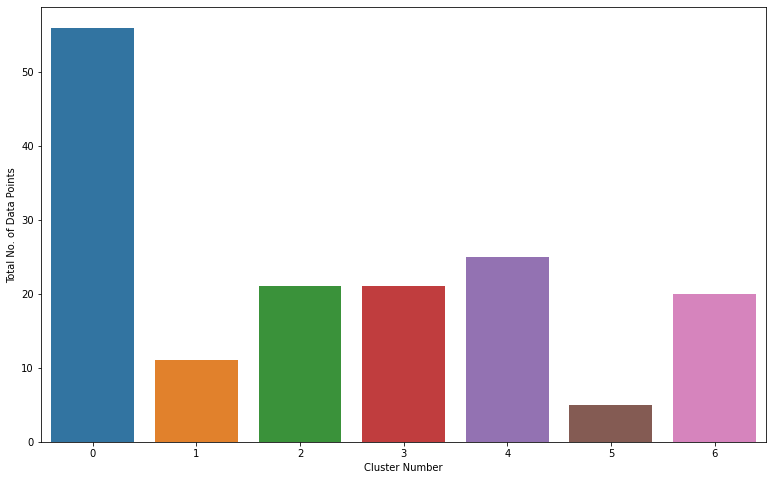

In [448]:
#Visualizing Number of Elements in each cluster

plt.figure(figsize=(13,8))
axis = sns.barplot(x=np.arange(0,7,1),y=df1.groupby(['Cluster']).count()['Species'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Total No. of Data Points")

C:\Users\NANDISH\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


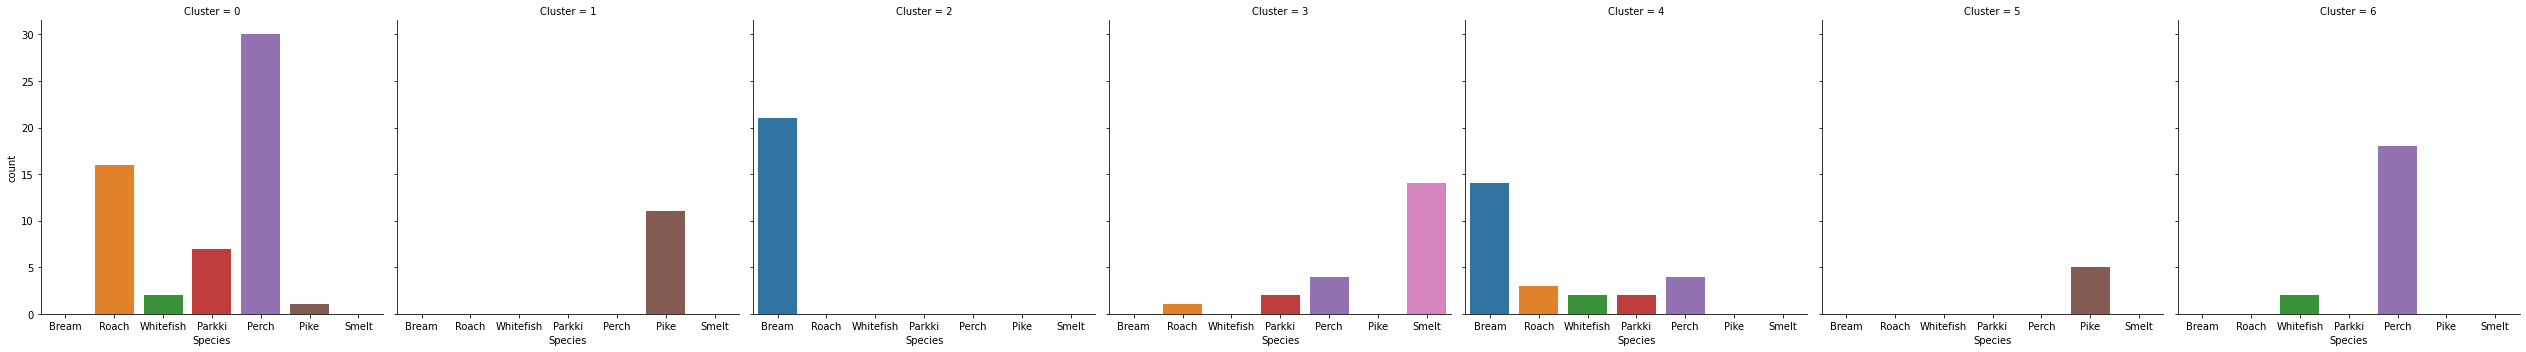

In [449]:
#Factor Plots to visualize fish species in each cluster and to compare with true label

sns.factorplot(col='Cluster', y=None, x='Species', data=df1, kind='count')

In [450]:
#Cross Tabulation is done to quantitatively analyze the relationship between multiple variables.

ct = pd.crosstab(df1['Cluster'], df1['Species'])

# printing ct
print(ct)

Species  Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
Cluster                                                     
0            0       7     30     1     16      0          2
1            0       0      0    11      0      0          0
2           21       0      0     0      0      0          0
3            0       2      4     0      1     14          0
4           14       2      4     0      3      0          2
5            0       0      0     5      0      0          0
6            0       0     18     0      0      0          2
